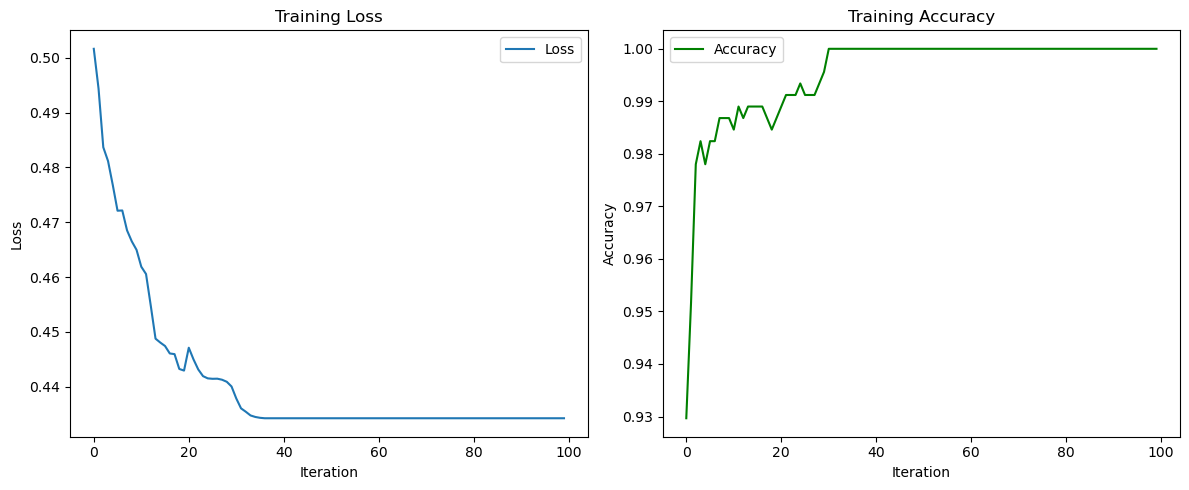

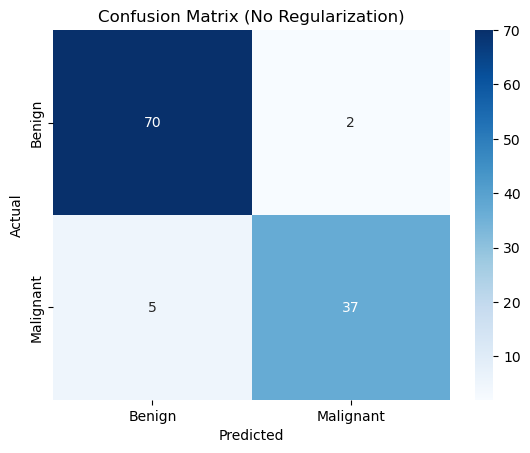

Without Regularization:
Accuracy : 0.9386
Precision: 0.9487
Recall   : 0.8810
F1 Score : 0.9136


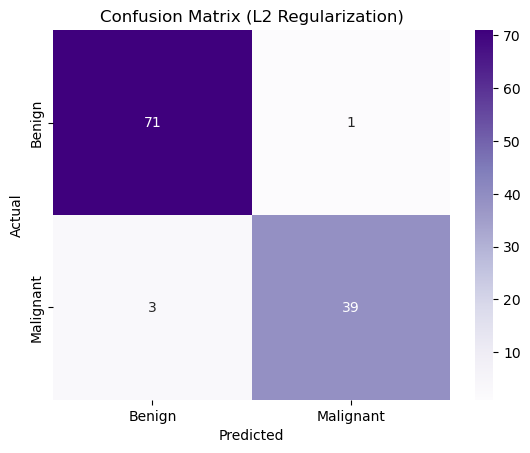


With L2 Regularization:
Accuracy : 0.9649
Precision: 0.9750
Recall   : 0.9286
F1 Score : 0.9512


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.exceptions import ConvergenceWarning

# Suppress warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Load and prepare the cancer dataset
df = pd.read_csv('../Datasets/cancer.csv')
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
df = df.loc[:, ~df.columns.str.contains('^id|Unnamed', case=False)]

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Scale and split data
X_scaled = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Logistic Regression without regularization (C set very high)
losses, accuracies = [], []
for i in range(1, 101):
    model = LogisticRegression(max_iter=i, C=1e12, solver='lbfgs')
    model.fit(X_train, y_train)
    logits = model.decision_function(X_train)
    losses.append(np.mean(np.log(1 + np.exp(-y_train * logits))))
    accuracies.append(accuracy_score(y_train, model.predict(X_train)))

# Final model and evaluation
model = LogisticRegression(max_iter=1000, C=1e12, solver='lbfgs')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Plot loss and accuracy over iterations
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1); plt.plot(losses, label="Loss"); plt.title("Training Loss"); plt.xlabel("Iteration"); plt.ylabel("Loss"); plt.legend()
plt.subplot(1, 2, 2); plt.plot(accuracies, label="Accuracy", color="green"); plt.title("Training Accuracy"); plt.xlabel("Iteration"); plt.ylabel("Accuracy"); plt.legend()
plt.tight_layout(); plt.show()

# Confusion matrix and metrics for no regularization
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.title("Confusion Matrix (No Regularization)"); plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.show()

print("Without Regularization:")
print(f"Accuracy : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score : {f1_score(y_test, y_pred):.4f}")

# Logistic Regression with L2 regularization
model_reg = LogisticRegression(max_iter=1000, C=1.0, solver='lbfgs')
model_reg.fit(X_train, y_train)
y_pred_reg = model_reg.predict(X_test)

# Confusion matrix and metrics for L2 regularization
sns.heatmap(confusion_matrix(y_test, y_pred_reg), annot=True, fmt='d', cmap='Purples',
            xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.title("Confusion Matrix (L2 Regularization)"); plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.show()

print("\nWith L2 Regularization:")
print(f"Accuracy : {accuracy_score(y_test, y_pred_reg):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_reg):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred_reg):.4f}")
print(f"F1 Score : {f1_score(y_test, y_pred_reg):.4f}")
